#####Read data through google drive

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Importing libraries that are useful for the task

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid',palette='cividis')
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from termcolor import colored as cl 
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler







#Data Understanding :

The data set includes credit card transactions. Out of a total sample few are fraudulent. This data set is highly unbalanced, with the positive class (frauds) as compare with total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

Reading data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Task_data.csv')

In [4]:
df.head() # print the first rows to understand the data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Exploratory Data Analysis :
We first perform EDA task to understand the nature of the data 

In [5]:
#checking the rows and columns
rows,columns=df.shape
print('NUMBER OF ROWS :',rows,'NUMBER OF COLUMNS :',columns)

NUMBER OF ROWS : 284807 NUMBER OF COLUMNS : 31


Data does not contain any null value and all data types are correct according to the standard format .

In [6]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#####Fraudulent Transactions : 492
#####Non-Fraudulent Transaction : 284315


In [8]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


#Checking transaction value 

In [9]:
min_amount,max_amount=min(df.Amount),max(df.Amount)
print('Minimum transaction amount :',min_amount,'Maximum transaction amount')

Minimum transaction amount : 0.0 Maximum transaction amount


##### 99% are fraudulent and 0.17% are non-fraudulent

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


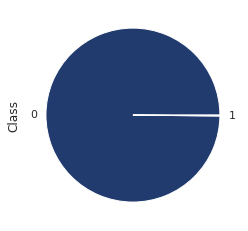

In [10]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

### BarChart is the another way to plot the data in pictorial format to check the relation ship between two classes .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


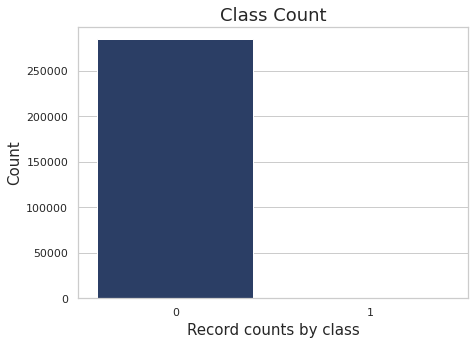

In [11]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

## CORRELATION PLOT IS THE ONE WAY TO CHECK THE CORRELATION BETWEEN FEATURES PRESENT IN THE DATASET .

#Conclusion :     
As show in the dataset most of the values contain correlation between 0.2 to -1
only the diagional entries contain 1 values which are correlate with themselves

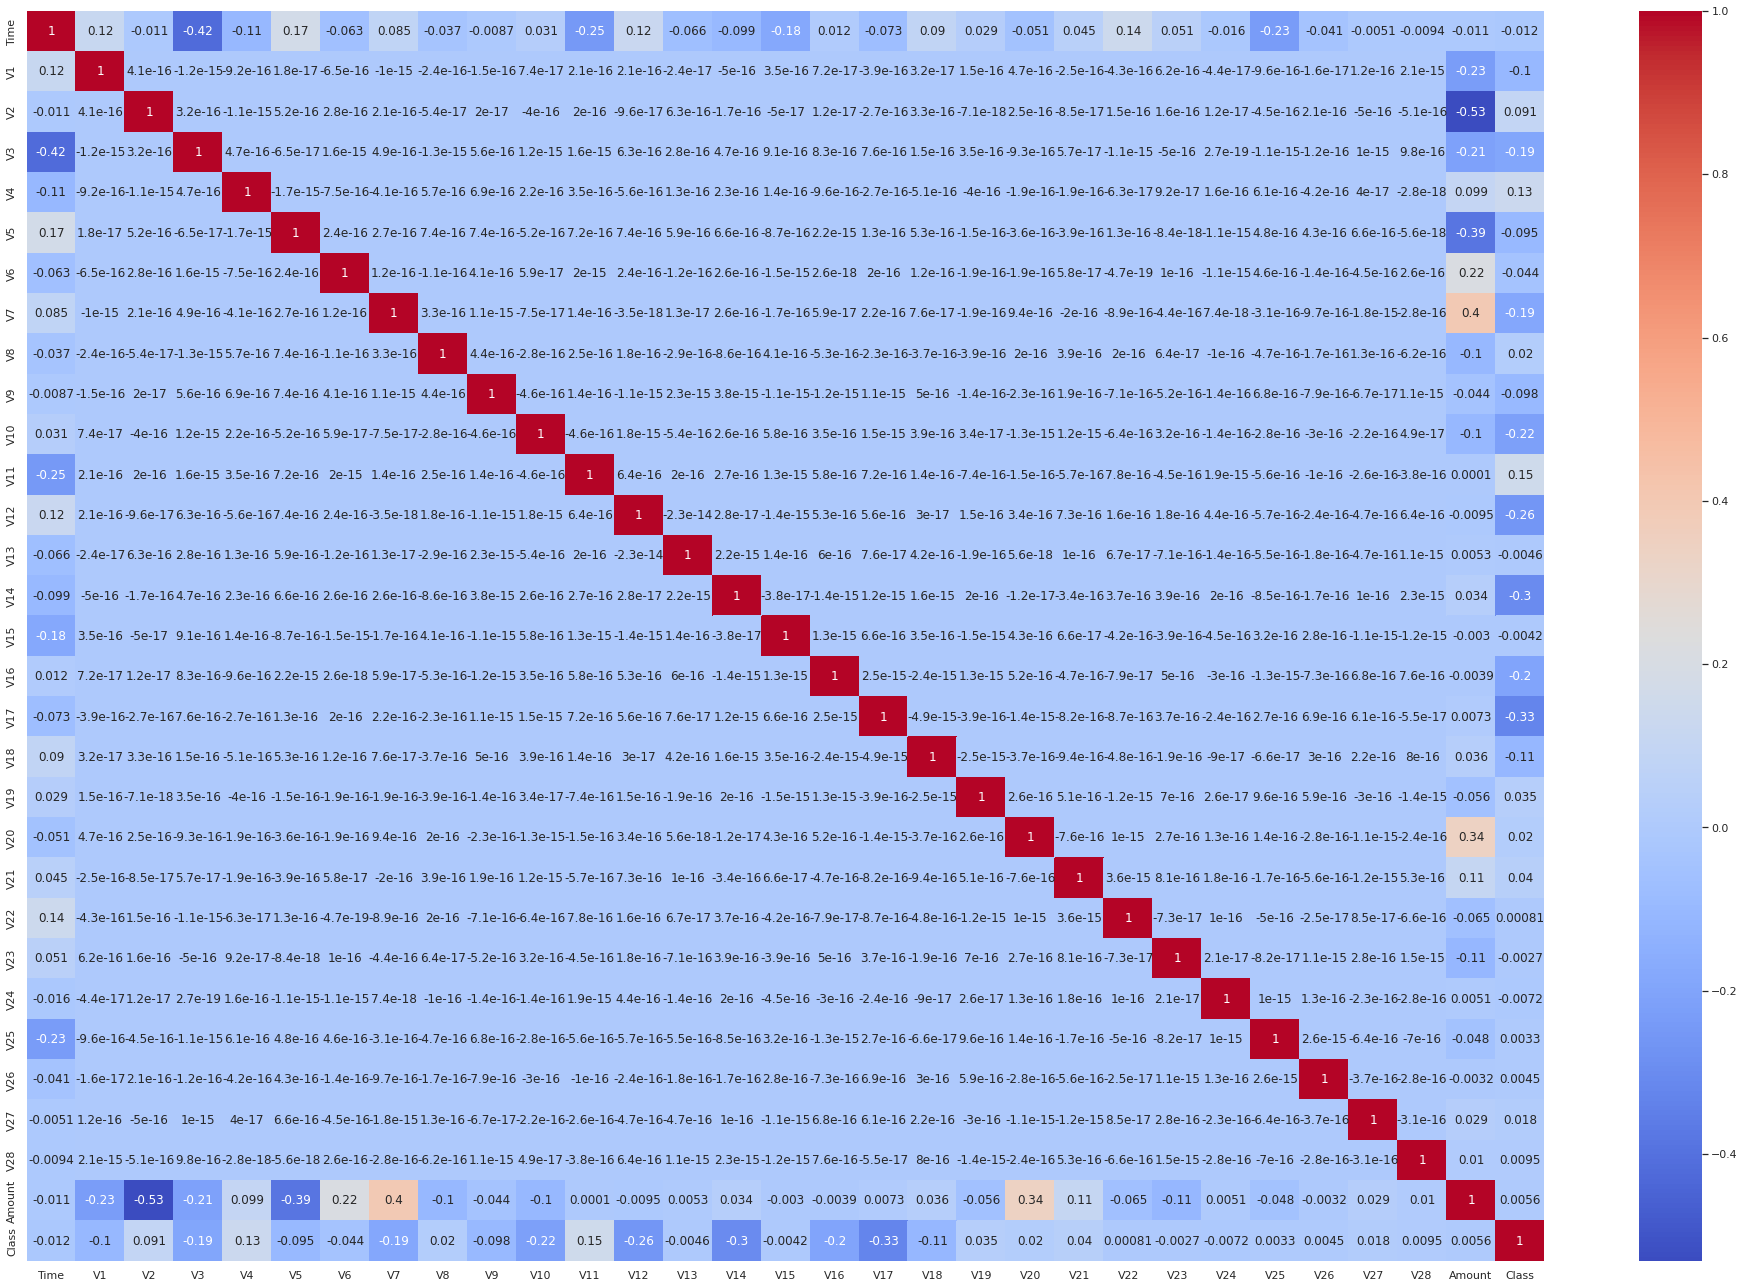

In [12]:
# Checking the correlation in heatmap
corr = df.corr()
plt.figure(figsize=(34,23))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

#Checking Outliers in ‘Amount’ values:


#Conculsion :     
##Most of the values are above the upper limit of box plot they are counting in outliers we will handle it in preprocessing part

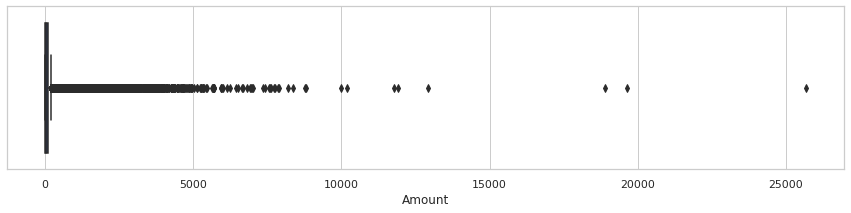

In [13]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df)
plt.show()

#Lets dig it down and check which class contain maximum amount transactions 

#Conclusion :    
######The Amount column value are right skewed as we can seen in the df.describe() the mean is greater then median so most of the values including outliers are laying on the upper end .

In [14]:
fraud_trans=df.loc[df['Class']==1]

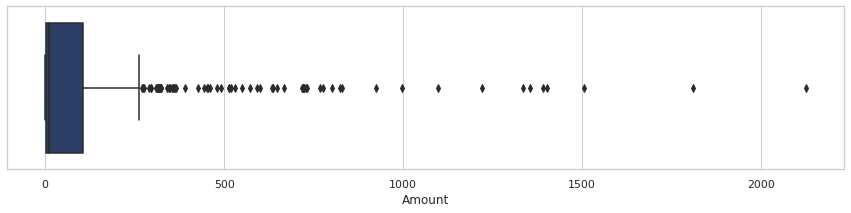

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=fraud_trans)
plt.show()

In [16]:
non_fraud_trans=df.loc[df['Class']==0]

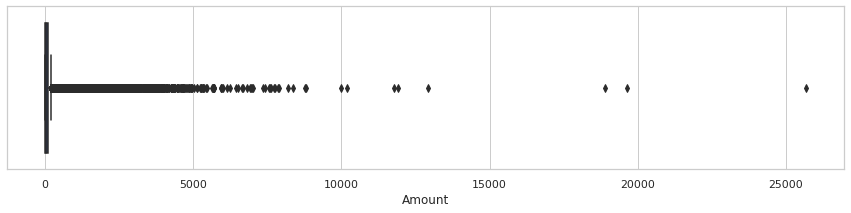

In [17]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=non_fraud_trans)
plt.show()

#Feature Engineeting Extract features from the data :
The time format is present in seconds as we all know that the data coming from transaction is stream data but we also have to extract mint hour and days from data to make our model more efficient.

In [18]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

#Now we will perform our analysis according to time 

#During the day time non fraud transactions  are less as compare with the night time

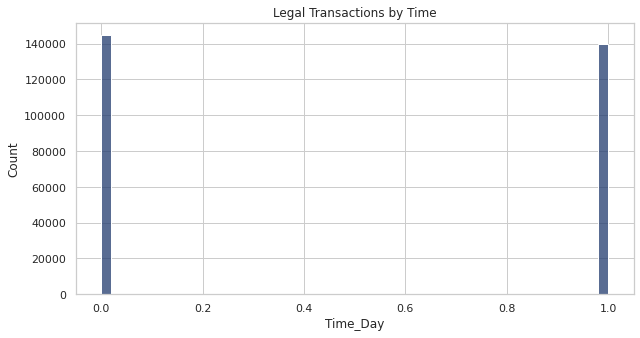

In [19]:
#Rearranging the columns
# legal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time_Day[df.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()


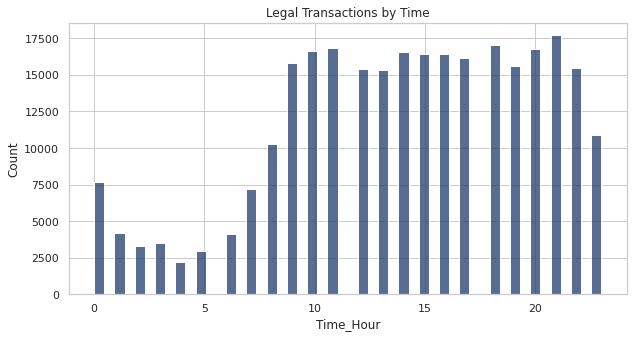

In [20]:
#Rearranging the columns
# legal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time_Hour[df.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()


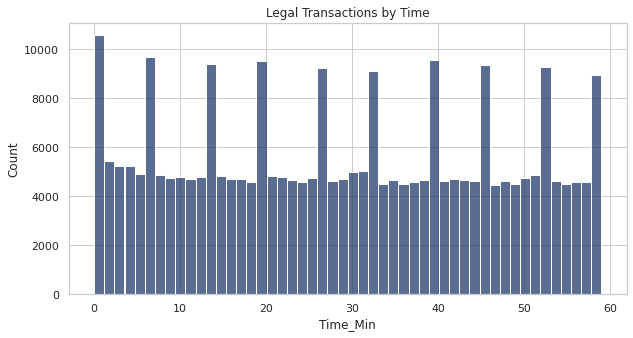

In [21]:
#Rearranging the columns
# legal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time_Min[df.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()


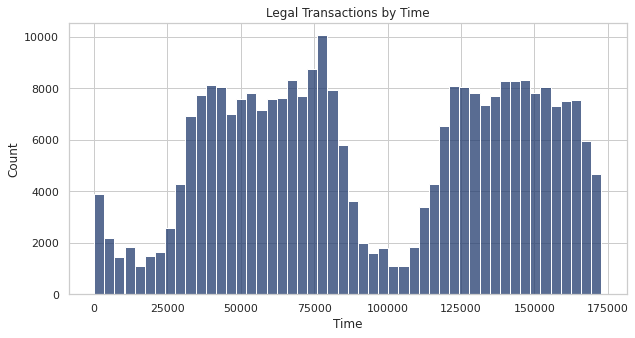

In [22]:
#Rearranging the columns
# legal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time[df.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()

#During the day time  fraud transactions  are less as compare with the night time and most of the fraudulent transaction have done in late hours

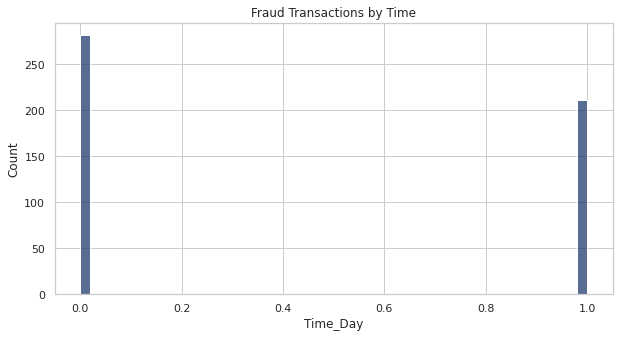

In [23]:
#Rearranging the columns
# Fraud transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time_Day[df.Class==1]), bins=50);
ax.set_title('Fraud Transactions by Time')
plt.show()

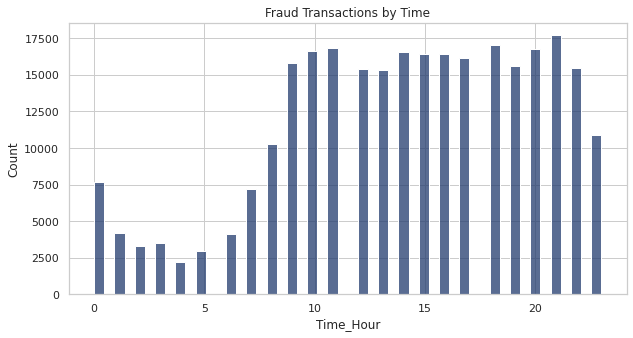

In [24]:
#Rearranging the columns
# Fraud transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time_Hour[df.Class==0]), bins=50);
ax.set_title('Fraud Transactions by Time')
plt.show()

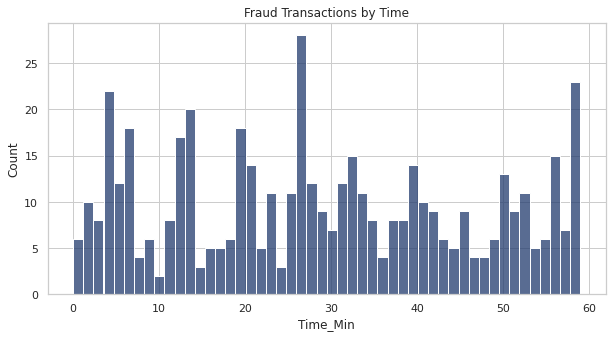

In [25]:
#Rearranging the columns
# Fraud transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time_Min[df.Class==1]), bins=50);
ax.set_title('Fraud Transactions by Time')
plt.show()

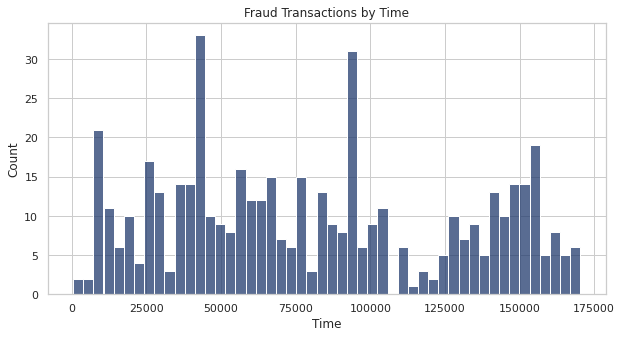

In [26]:
#Rearranging the columns
# Fraud transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Time[df.Class==1]), bins=50);
ax.set_title('Fraud Transactions by Time')
plt.show()

#Now we will perform our analysis according to Amount

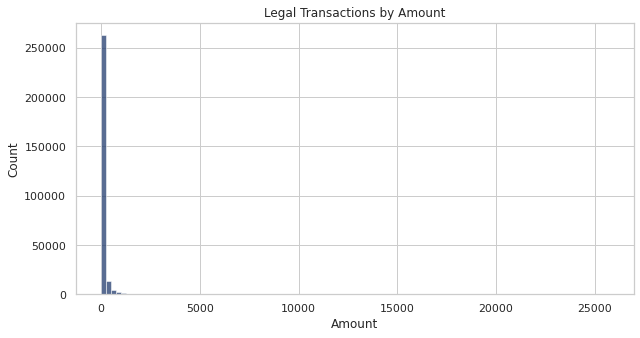

In [27]:
# legal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Amount[df.Class==0]), bins=100)
ax.set_title('Legal Transactions by Amount')
plt.show()

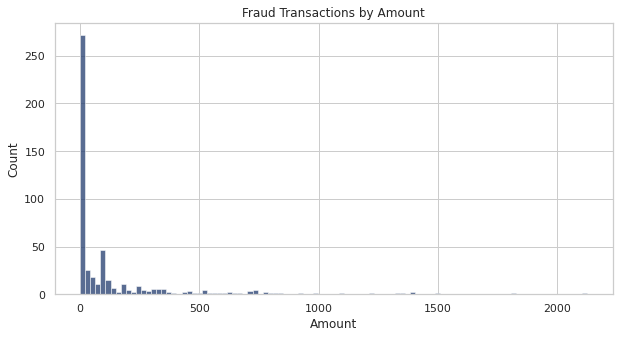

In [28]:
# Fraud transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df.Amount[df.Class==1]), bins=100)
ax.set_title('Fraud Transactions by Amount')
plt.show()

#Data Preprocessing :

#Drop Duplicates :
Duplicate value in the dataset may cause distubance so we have to drop duplicate transactions to make our model more robust

In [29]:
df.drop_duplicates(inplace=True)

#Feature Transformation :     

Our Amount feature large amount of value the the shape is right skewed

In [30]:
Standard_scaler = StandardScaler()
Quantile_scaler = QuantileTransformer()

df['Amount'] = Quantile_scaler.fit_transform(df.Amount.values.reshape(-1, 1))
df['Time'] = Standard_scaler.fit_transform(df.Time.values.reshape(-1, 1))
df['Time_Hour'] = Standard_scaler.fit_transform(df.Time_Hour.values.reshape(-1, 1))
df['Time_Min'] = Standard_scaler.fit_transform(df.Time_Min.values.reshape(-1, 1))


Other features are already normalized so we dont need to preprocess them 

In [31]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [32]:
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Day,Time_Hour,Time_Min
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.857994,0,-2.407217,-1.663972
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.186186,0,-2.407217,-1.663972


In [33]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

In [34]:
cols=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']

###Few of the varaible form normal disribution some form right skewed distribution and other form left skewed distribution againt target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

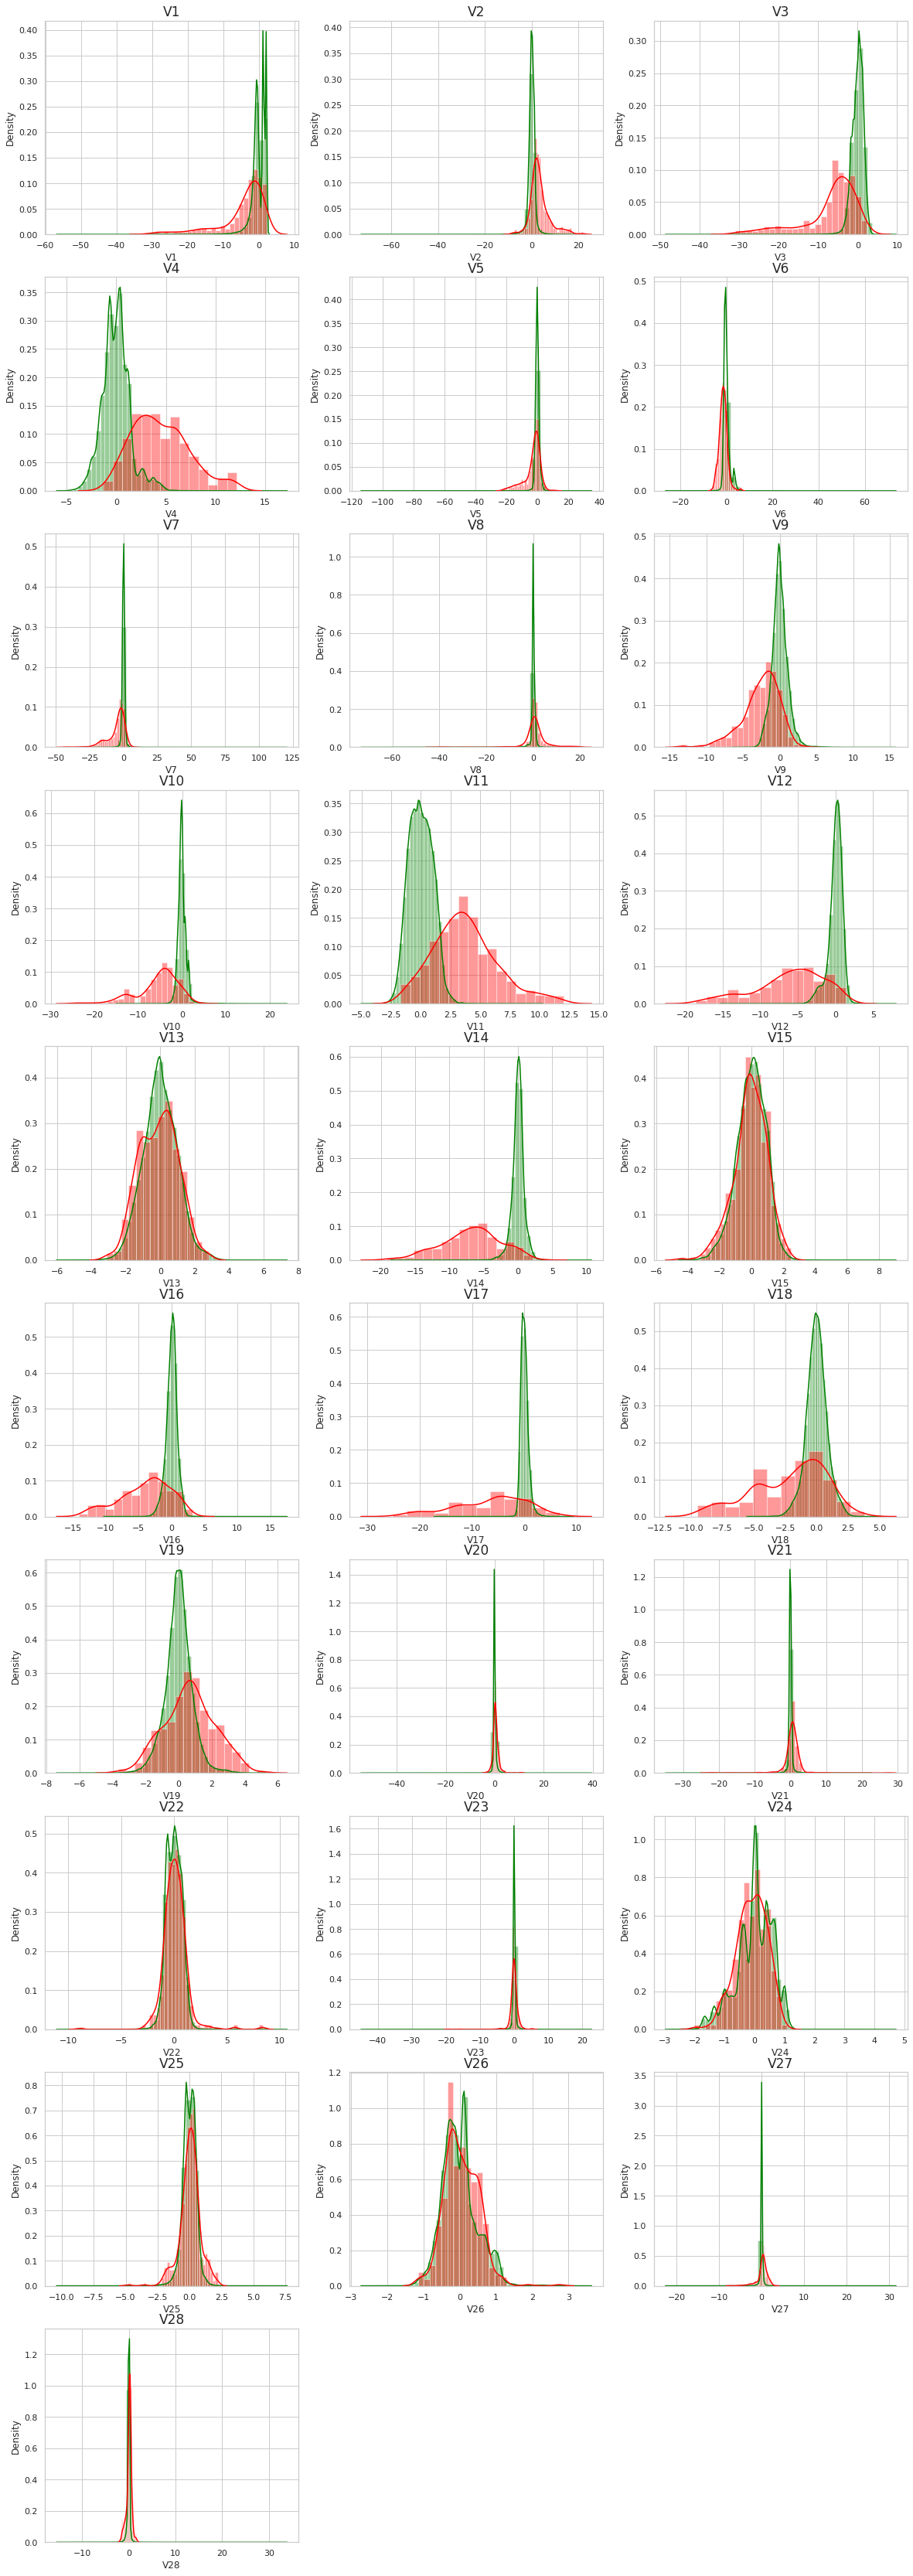

In [35]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], kde=True,color='green')
  sns.distplot(X[col][fraud_records],kde=True, color='red')
  plt.title(col, fontsize=17)
plt.show()

#Transformer Funtion On Amount variable
#### To remove outlier  and made the distribution from right skewed to uniform distribution we use quantile tranformer. 

####As shown in the box plot the outliers are totally removed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


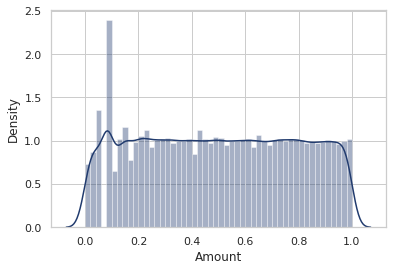

In [36]:
sns.distplot(X['Amount'],kde=True)

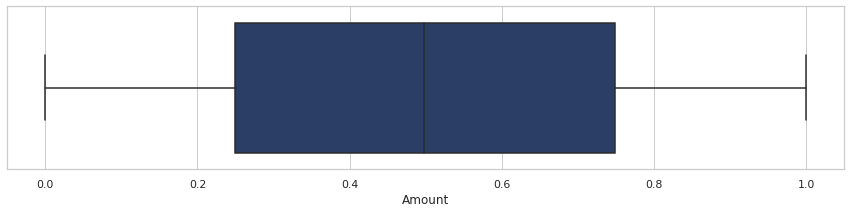

In [37]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=X)
plt.show()

# now the data is normally distributed so we donot saw any outlier in the violinplot .

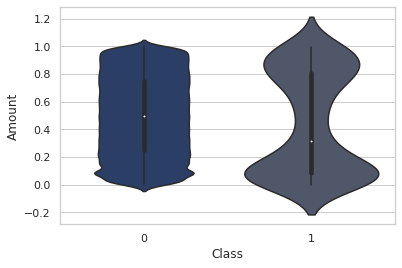

In [38]:
sns.violinplot(x="Class", y="Amount", data=df)

# Splitting the dataset using train test split


In [39]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

# Model Building

#Note :      
#The dataset is highly imbalanced so we apply different sampling techniques to handle it and pick up the model that gives us best results.

####All our result will store in df_Results for interpretation and visualization purpose

In [40]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

#Model Performance :
In the report below, we’ve some metrics to check the model performance, let’s make a brief explanation about how to understand those values, and evaluate the machine learning model. Before explaining the mathematical formulas, we will explain some terms and what it does represent.

#TN — True Negative: when a case was negative and predicted negative;
#TP — True Positive: when a case was positive and predicted positive;
#FN — False Negative: when a case was positive but predicted negative;
#FP — False Positive: when a case was negative but predicted positive

In [41]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [42]:
# # Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'# we  can also take another metric like we can check scoring=accuracy
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_)  


  #find predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)

    
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)


  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [43]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [44]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [45]:
#Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))

  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

#RepratedKFold Cross Validation :     
It is a technique in which we repeat the number of k fold in the dataset

In [46]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9844012502167369
Max auc_roc for l2: 0.9855803763305662
Parameters for l1 regularisations
[[ 5.07062275e-01  3.97092654e-02 -2.06749391e-01 -9.26750511e-02
   7.02198199e-02 -9.11958192e-02  4.11241437e-02 -6.97130941e-02
  -1.28188061e-01 -1.79956785e-01 -1.22375598e-01  4.51454398e-03
  -2.50002972e-01  1.84413699e-04 -3.90765114e-01 -1.74416575e-01
  -2.90254817e-01 -1.07181614e-01  6.10217698e-02  8.84952651e-03
  -6.45092902e-04  1.59178451e-01  2.13490629e-01 -2.06689648e-02
  -6.87727211e-02 -2.28466974e-01  2.31751298e-02 -1.55058889e-01
  -2.44483352e-02 -4.25288591e+00 -1.31069439e+00 -1.97476362e-01
  -1.29826755e-02]]
[-3.61873507]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.93023409, 0.97387667, 0.94660153,
        0.94093832, 0.9383473 , 0.93176049, 0.92917055, 0.94344968,
        0.93886723, 0.95177173, 0.96670642, 0.94632596, 0.93680905],

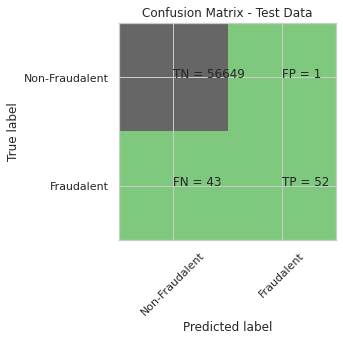

Accuarcy of Logistic model with l1 regularisation : 0.999242223984492
Confusion Matrix


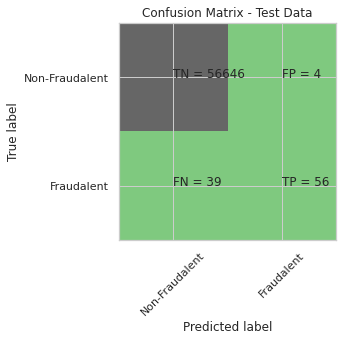

l2 roc_value: 0.9680113346030567
l2 threshold: 0.0020043789840178024
ROC for the test dataset 96.8%


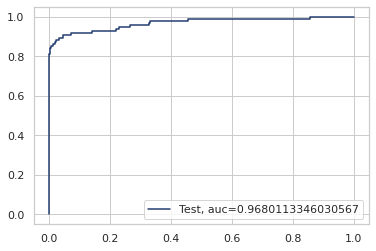

l1 roc_value: 0.9441913875598086
l1 threshold: 0.021876848816341322
ROC for the test dataset 94.4%


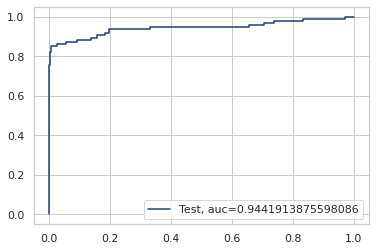

In [47]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)


KNN Model
model score
0.9995065644550181
Confusion Matrix


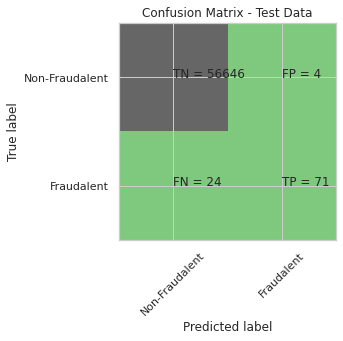

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.95      0.75      0.84        95

    accuracy                           1.00     56745
   macro avg       0.97      0.87      0.92     56745
weighted avg       1.00      1.00      1.00     56745

KNN roc_value: 0.9156946160635481
KNN threshold: 0.2
ROC for the test dataset 91.6%


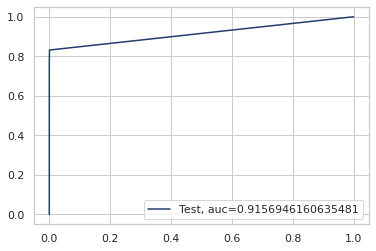

In [48]:
#Run KNN Model
print("KNN Model")
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

Random Forest Model
Model Accuracy: 0.9995946779451934
Confusion Matrix


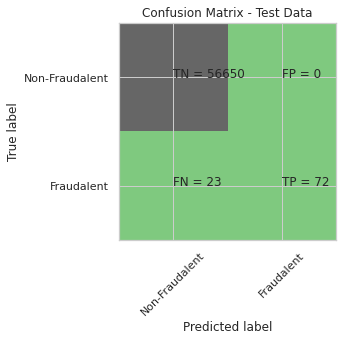

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       1.00      0.76      0.86        95

    accuracy                           1.00     56745
   macro avg       1.00      0.88      0.93     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.929775351883681
Random Forest threshold: 0.02
ROC for the test dataset 93.0%


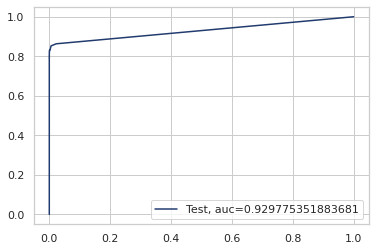

In [49]:
print("Random Forest Model")
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

SVM Model with Sigmoid Kernel
accuracy_score : 0.9976033130672306
Confusion Matrix


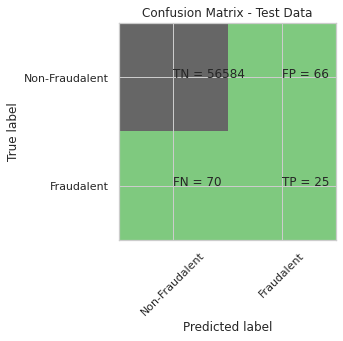

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.27      0.26      0.27        95

    accuracy                           1.00     56745
   macro avg       0.64      0.63      0.63     56745
weighted avg       1.00      1.00      1.00     56745

SVM roc_value: 0.5725812235796905
SVM threshold: 0.006656506042980496
ROC for the test dataset 57.3%


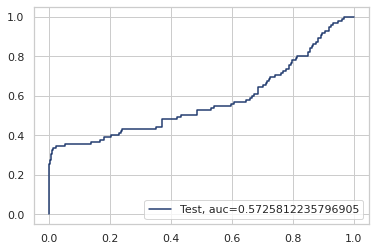

In [50]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

#Perform cross validation with StratifiedKFold

In [51]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.970487353122315
Max auc_roc for l2: 0.9808436163899785
Parameters for l1 regularisations
[[ 4.51073221e-01  2.06895872e-02 -1.80508685e-01 -1.21615250e-01
  -1.32809818e-02 -1.15421992e-01  9.44143969e-03 -3.32425560e-02
  -5.57679815e-02 -7.81912709e-02 -6.80184946e-02 -2.40912846e-02
  -2.80898624e-01  7.38043998e-02 -2.22598585e-01 -2.21735153e-01
  -2.17174915e-01 -1.10977594e-01 -1.32192889e-02  2.28005919e-02
   8.99983102e-03  1.25609794e-01  1.58117023e-01  2.77595313e-02
  -5.17085174e-02 -2.56462289e-01  2.83442792e-02 -4.88660564e-02
  -4.22506319e-02 -3.95991325e+00 -8.26776881e-01  1.98234115e-01
  -2.55514932e-03]]
[-2.8906853]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.90167289, 0.92119283, 0.92003555,
        0.87765367, 0.8512014 , 0.86088069, 0.8457579 , 0.86664692,
        0.8469404 , 0.87367127, 0.96919974, 0.86359109, 0.88349806],
 

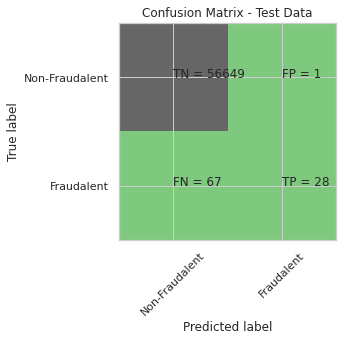

Accuarcy of Logistic model with l1 regularisation : 0.9988545246277205
Confusion Matrix


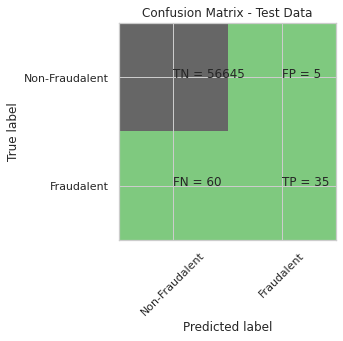

l2 roc_value: 0.9817315928833558
l2 threshold: 0.0014628121320975091
ROC for the test dataset 98.2%


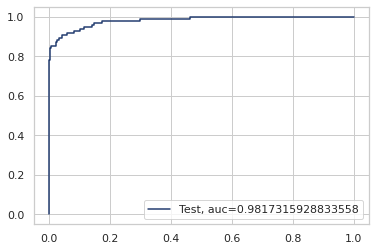

l1 roc_value: 0.9089766339945184
l1 threshold: 0.04409366698853964
ROC for the test dataset 90.9%


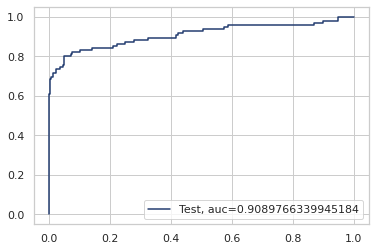

In [52]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

KNN Model
model score
0.999488941756983
Confusion Matrix


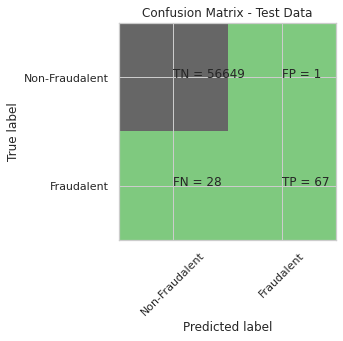

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.99      0.71      0.82        95

    accuracy                           1.00     56745
   macro avg       0.99      0.85      0.91     56745
weighted avg       1.00      1.00      1.00     56745

KNN roc_value: 0.878895526548056
KNN threshold: 0.2
ROC for the test dataset 87.9%


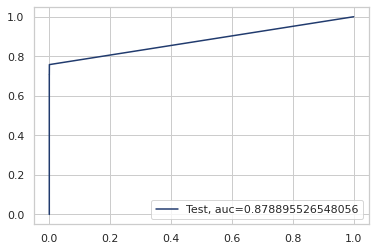

In [53]:
#Run KNN Model
print("KNN Model")
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

Random Forest Model
Model Accuracy: 0.9994360736628778
Confusion Matrix


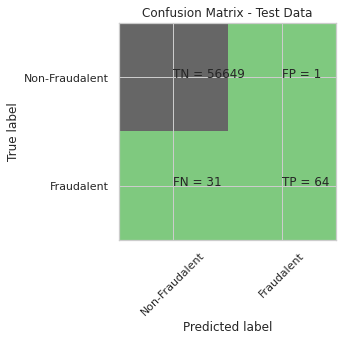

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.98      0.67      0.80        95

    accuracy                           1.00     56745
   macro avg       0.99      0.84      0.90     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.918358154875273
Random Forest threshold: 0.02
ROC for the test dataset 91.8%


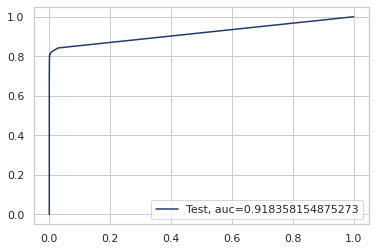

In [54]:
#Run Random Forest Model
print("Random Forest Model")
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

SVM Model with Sigmoid Kernel
accuracy_score : 0.9982553528945282
Confusion Matrix


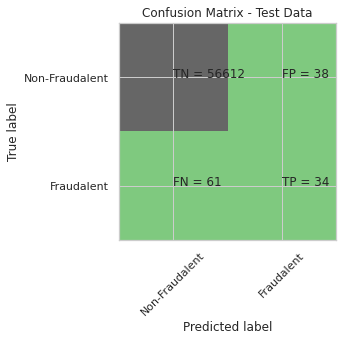

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.47      0.36      0.41        95

    accuracy                           1.00     56745
   macro avg       0.74      0.68      0.70     56745
weighted avg       1.00      1.00      1.00     56745

SVM roc_value: 0.8693791053096113
SVM threshold: 0.0005524822819995898
ROC for the test dataset 86.9%


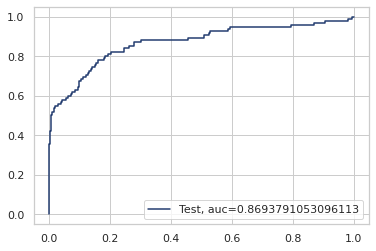

In [55]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)

#Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- Under Sampling

##Oversampling with Undersampling with StratifiedKFold Cross Validation

We will use Random Undersampling method to handle the class imbalance

In [56]:
# Creating dataframe with Smote and StratifiedKFold
rus = RandomUnderSampler()
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

X_train_SKF_cv, y_train_SKF_cv = rus.fit_resample(X_train_SKF_cv,  y_train_SKF_cv)


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9809536340726336
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

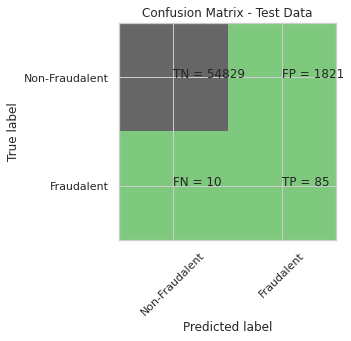

Accuarcy of Logistic model with l1 regularisation : 0.9983258436866684
Confusion Matrix


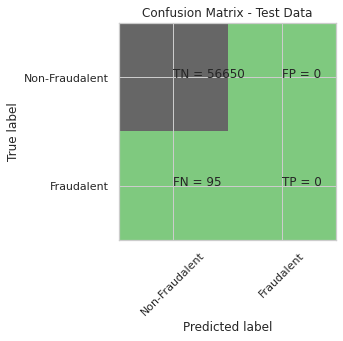

l2 roc_value: 0.9819564268128396
l2 threshold: 0.4667721874730389
ROC for the test dataset 98.2%


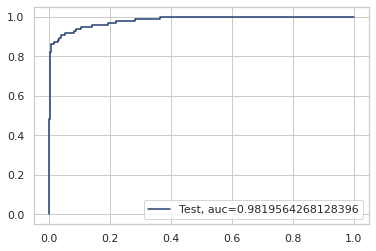

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


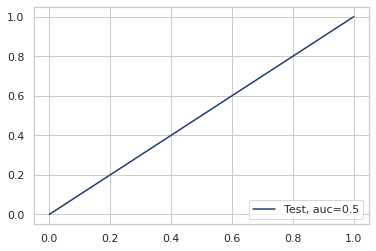

In [57]:
Data_Imbalance_Handiling	 = "Undersampling method with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_train_SKF_cv, y_train_SKF_cv,X_test_SKF_cv, y_test_SKF_cv)

KNN Model
model score
0.9879813199400829
Confusion Matrix


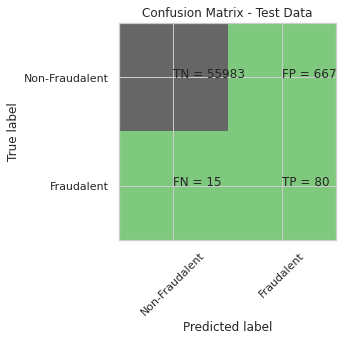

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56650
           1       0.11      0.84      0.19        95

    accuracy                           0.99     56745
   macro avg       0.55      0.92      0.59     56745
weighted avg       1.00      0.99      0.99     56745

KNN roc_value: 0.9617307567241138
KNN threshold: 0.4
ROC for the test dataset 96.2%


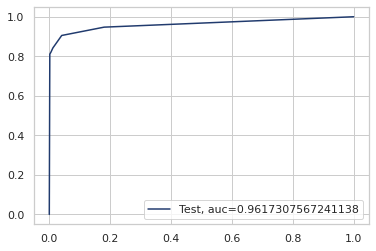

In [58]:
#Run KNN Model
print("KNN Model")
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_train_SKF_cv, y_train_SKF_cv,X_test_SKF_cv, y_test_SKF_cv)


Random Forest Model
Model Accuracy: 0.9675037448233325
Confusion Matrix


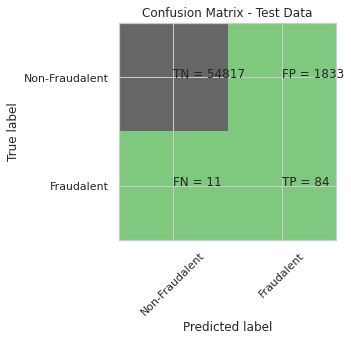

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56650
           1       0.04      0.88      0.08        95

    accuracy                           0.97     56745
   macro avg       0.52      0.93      0.53     56745
weighted avg       1.00      0.97      0.98     56745

Random Forest roc_value: 0.9743178334184978
Random Forest threshold: 0.53
ROC for the test dataset 97.4%


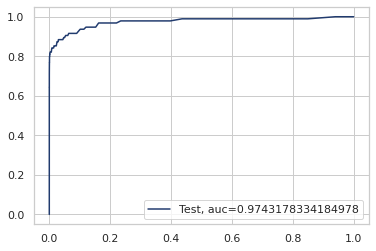

In [59]:
#Run Random Forest Model
print("Random Forest Model")
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_train_SKF_cv, y_train_SKF_cv,X_test_SKF_cv, y_test_SKF_cv)

SVM Model with Sigmoid Kernel
accuracy_score : 0.9089435192527976
Confusion Matrix


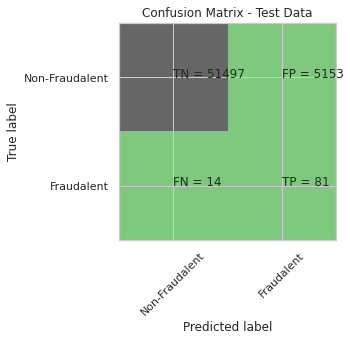

classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56650
           1       0.02      0.85      0.03        95

    accuracy                           0.91     56745
   macro avg       0.51      0.88      0.49     56745
weighted avg       1.00      0.91      0.95     56745

SVM roc_value: 0.9481812607423237
SVM threshold: 0.6575461537049198
ROC for the test dataset 94.8%


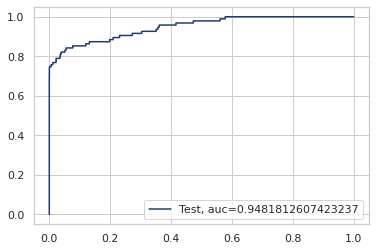

In [60]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_train_SKF_cv, y_train_SKF_cv,X_test_SKF_cv, y_test_SKF_cv)

#Result Visualization 

In [61]:
RepeatedKFold_Cross_Validation=df_Results.loc[df_Results['Methodology']=='RepeatedKFold Cross Validation']

[]

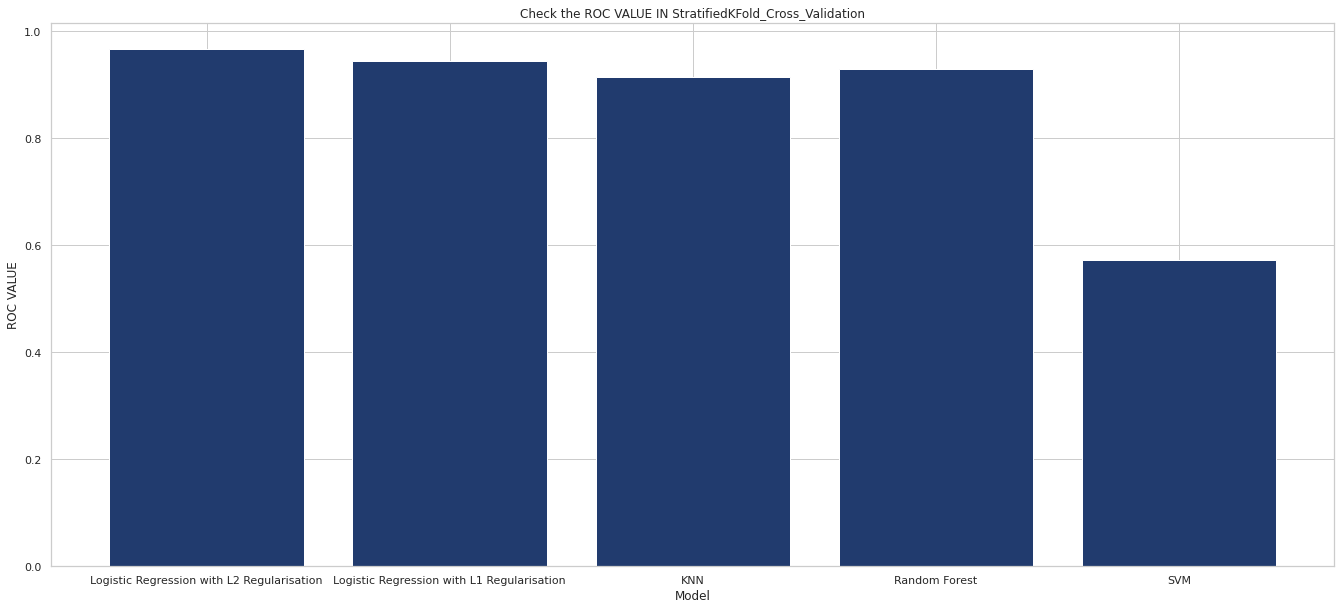

In [62]:
Model=list(RepeatedKFold_Cross_Validation['Model'])
Roc=list(RepeatedKFold_Cross_Validation['roc_value'])
ax = fig.add_axes([0,0,1,1])
fig = plt.figure(figsize=(23,10))
plt.xlabel('Model')
plt.ylabel('ROC VALUE')
plt.title('Check the ROC VALUE IN StratifiedKFold_Cross_Validation')
plt.bar(Model,Roc)
plt.plot()

In [63]:
StratifiedKFold_Cross_Validation=df_Results.loc[df_Results['Methodology']=='StratifiedKFold Cross Validation']

[]

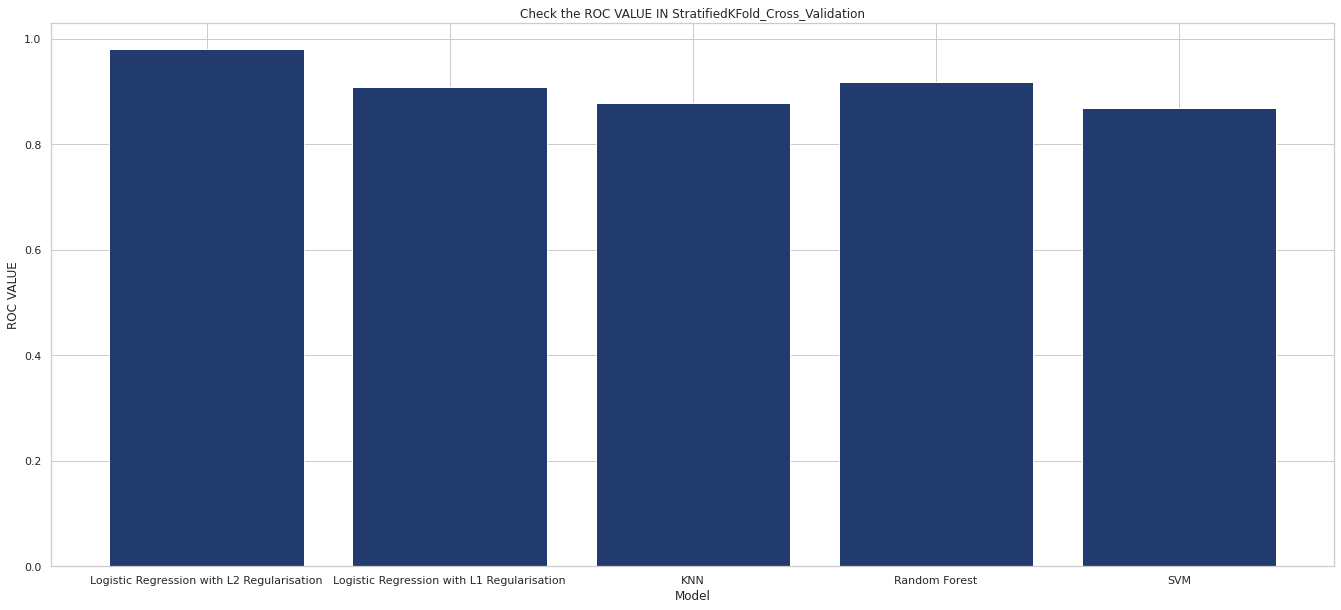

In [64]:
Model=list(StratifiedKFold_Cross_Validation['Model'])
Roc=list(StratifiedKFold_Cross_Validation['roc_value'])
ax = fig.add_axes([0,0,1,1])
fig = plt.figure(figsize=(23,10))
plt.xlabel('Model')
plt.ylabel('ROC VALUE')
plt.title('Check the ROC VALUE IN StratifiedKFold_Cross_Validation')
plt.bar(Model,Roc)
plt.plot()

In [65]:
Undersampling_method_with_StratifiedKFold_CV=df_Results.loc[df_Results['Methodology']=="Undersampling method with StratifiedKFold CV "]

[]

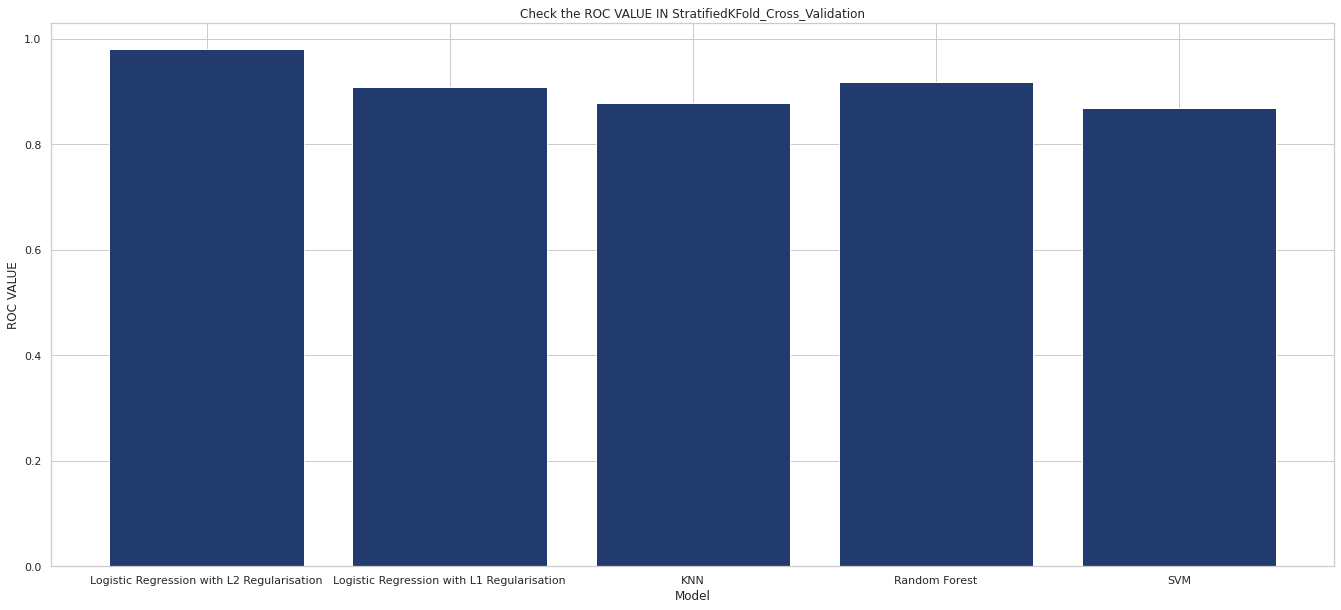

In [66]:
Model=list(StratifiedKFold_Cross_Validation['Model'])
Roc=list(StratifiedKFold_Cross_Validation['roc_value'])
ax = fig.add_axes([0,0,1,1])
fig = plt.figure(figsize=(23,10))
plt.xlabel('Model')
plt.ylabel('ROC VALUE')
plt.title('Check the ROC VALUE IN StratifiedKFold_Cross_Validation')
plt.bar(Model,Roc)
plt.plot()

#Result Interpretation

###Conclusion of best Model:      
#(RepeatedKFold Cross Validation	Logistic Regression with L2 Regularisation) :	
Perform well as seen in the df_Result table so we can test this model on different datasets to check the result the roc_value is 0.991313
